In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial

# Q1.3

In [208]:
samples = np.random.randn(40, 2)
samples[:20] += np.array([4, 0])
samples[20:30] += np.array([-4, 0])
samples[30:40] += np.array([-2, 0])
n, D = samples.shape

In [209]:
def run_kmeans_and_plot(samples, beta, n, k):
    kmeans_iterations = 10
    plt.figure(figsize=(20, 4))
    plt.suptitle("K-Means Results ($\\beta=%0.2f$) with 5 Different Initialization" % beta, fontsize=20)
    for i in range(5):
        means = samples[np.random.choice(n, size=k), :]
        for iteration in range(kmeans_iterations):
            dist = scipy.spatial.distance.cdist(samples, means, 'euclidean') ** 2        
            q_nominator = np.exp(-beta * dist)
            z = q_nominator.sum(axis=1)
            q = (q_nominator.T / z).T
            nominator_sum = np.zeros(means.shape)
            for m in range(n):
                nominator_sum += q[m].reshape(-1,1) * samples[m].reshape(1,-1)
            for l in range(k):
                means[l] = nominator_sum[l] / q.sum(axis=0)[l]

        plt.subplot(1, 5, 1 + i)
        plt.scatter(samples[:, 0], samples[:, 1], c=q[:, 0], s=40);
        plt.plot(means[0, 0], means[0, 1], 'xy',markersize=20);
        plt.plot(means[1, 0], means[1, 1], 'xk', markersize=20);

    plt.show()

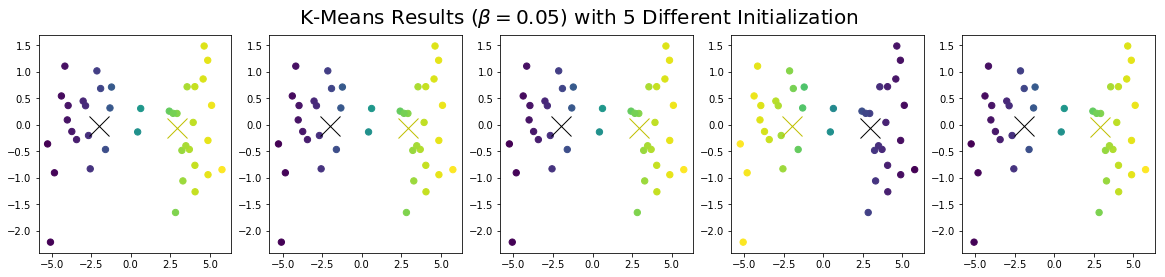

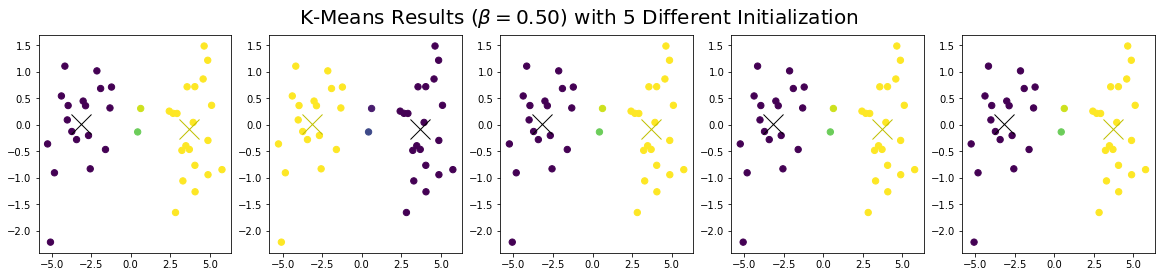

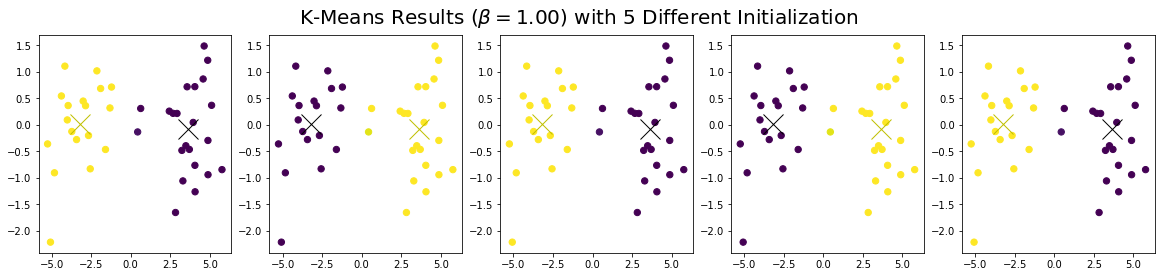

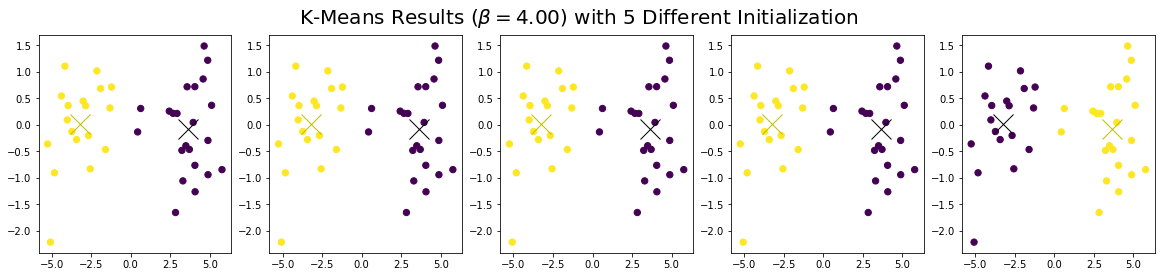

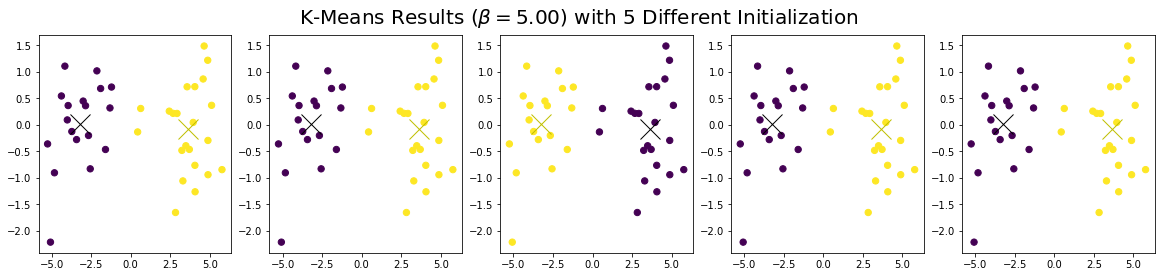

In [210]:
k = 2
for beta in [0.05, 0.5, 1, 4, 5]:
    run_kmeans_and_plot(samples, beta, n, k)

## (e)
We will expect samples 1-20 to be in cluster A, and samples 20-40 to be in cluster B.
All algorithms have a fair clustering. for $\beta=0.05$ the means are well located but some datapoints have not a low chance to be clustered wrong, because the Entropy has a large score.

## (f)
All algorithms look consistent. The entropy J consists of exponent of the data, so for a small a beta we will be more stablized to noise.